<a href="https://colab.research.google.com/github/theMorana/HSE/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание: линейные модели для NLP**

## **Что будем делать?**
Мы будем предсказывать, к какой категории относится новость: про хоккей или про космос.

## **Часть 1. Практическая работа (8 баллов)**

### **1. Загрузка данных**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Загружаем данные о новостях
categories = ['rec.sport.hockey', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all',
                               categories=categories,
                               shuffle=True,
                               random_state=42)

# Создаём таблицу с данными
data = pd.DataFrame({
    'text': newsgroups.data,
    'category': newsgroups.target  # 0 = хоккей, 1 = космос
})

print("Размер данных:", data.shape)
print("\nПервые 3 текста:")
for i in range(3):
    print(f"Текст {i+1}: {data['text'][i][:100]}...")

Размер данных: (1986, 2)

Первые 3 текста:
Текст 1: From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: Vandalizing the sky.
Article-I....
Текст 2: From: epritcha@s.psych.uiuc.edu ( Evan Pritchard)
Subject: Re: div. and conf. names
Distribution: na...
Текст 3: From: baalke@kelvin.jpl.nasa.gov (Ron Baalke)
Subject: Galileo Update - 04/29/93
Keywords: Galileo, ...


**Задание 1:**
- Сколько всего текстов в датасете?
- Выведите количество текстов в каждой категории

### **2. Анализ данных**

In [ ]:
# Ваш код здесь
# Подсказка: используйте value_counts()

counts = data['category'].value_counts()

print("Количество текстов по категориям:")
print(f"  Хоккей (0): {counts[0]} текстов")
print(f"  Космос (1): {counts[1]} текстов")
print("Всего текстов в датасете:", len(data))

'''
или просто

print(data['category'].value_counts())
'''

Количество текстов по категориям:
  Хоккей (0): 999 текстов
  Космос (1): 987 текстов
Всего текстов в датасете: 1986


"\nили просто\n\nprint(data['category'].value_counts())\n"

**Вопрос:** Какая категория больше: хоккей или космос?
Ответ: Хоккей

### **3. Очистка текста**

In [ ]:
import re

def clean_text(text):
    # Ваш код здесь
    # 1. Привести текст к нижнему регистру (.lower())
    # 2. Удалить всё, кроме букв и пробелов (re.sub)
    # 3. Убрать лишние пробелы
    text = text.lower()
    text = re.sub(r'[^а-яА-Яa-zA-Z\s]', '', text).strip()
    return text

# Применяем функцию
data['clean_text'] = data['text'].apply(clean_text)

# Проверяем
print("До очистки:", data['text'][0][:100])
print("После очистки:", data['clean_text'][0][:100])

До очистки: From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: Vandalizing the sky.
Article-I.
После очистки: from mccallmksoldsegticom fred j mccall 
subject re vandalizing the sky
articleid mksolapr
organizat


### **4. Создание признаков (векторизация)**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Ваш код здесь
# 1. Создайте CountVectorizer (остановитесь на английском)
vectorizer = CountVectorizer(stop_words='english')
# 2. Преобразуйте тексты в числа (fit_transform)
X = vectorizer.fit_transform(data)
# 3. Выведите сколько слов получилось
'''
vectorizer.get_feature_names_out() - список всех токенов,
которые CountVectorizer нашёл в твоих текстах
и использовал как столбцы матрицы.
'''

print(f"Получилось слов: {len(vectorizer.get_feature_names_out())}")

print(f"Размер матрицы: {X.shape}")

Получилось слов: 3
Размер матрицы: (3, 3)


**Вопрос:** Сколько уникальных слов нашёл CountVectorizer? Ответ: 3

### **5. Разделение данных**

In [ ]:
from sklearn.model_selection import train_test_split

# Цель: предсказать категорию (0 или 1)
# что сюда подставить? (признаки)
X = vectorizer.fit_transform(data['clean_text'])
# что сюда подставить? (целевая переменная)
y = data['category']

# Ваш код здесь
# Разделите данные на 80% обучение, 20% тест
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### **6. Обучение модели**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Ваш код здесь
# 1. Создайте модель логистической регрессии
log_reg = LogisticRegression(max_iter=1000)
# 2. Обучите её на обучающих данных
log_reg.fit(X_train, y_train)
# 3. Сделайте предсказания для тестовых данных
y_pred = log_reg.predict(X_test)

### **7. Оценка модели**

In [ ]:
from sklearn.metrics import accuracy_score

# Ваш код здесь
# 1. Вычислите accuracy (точность) модели
accuracy = accuracy_score(y_test, y_pred)
# 2. Выведите результат в процентах
print(f"Точность модели: {accuracy:.1%}")

Точность модели: 99.5%


**Вопрос:** Какая точность у вашей модели? Что это значит?

Ответ: точность модели составляет 99.5%, что означает, что модель хорошо обучилась.


### **8. Анализ ошибок**

[[200   0]
 [  2 196]]


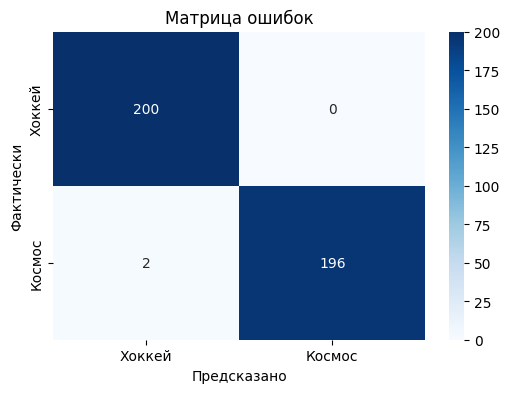

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Ваш код здесь
# 1. Создайте матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
# 2. Выведите её
print(cm)
# БОНУС: визуализируйте матрицу ошибок
plt.figure(figsize=(6, 4))
# Ваш код для визуализации здесь
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Хоккей', 'Космос'],
            yticklabels=['Хоккей', 'Космос'])
plt.xlabel('Предсказано')
plt.ylabel('Фактически')
plt.title('Матрица ошибок')
plt.show()

**Вопрос:** Сколько текстов про космос модель приняла за хоккей?

Ответ: 2 текста